<img alt="Colaboratory logo" width="100%" src="https://raw.githubusercontent.com/LuisCSGuimaraes/FraudesEmCartoesCreditoML/main/Images/Banner.png">


*Um projeto inspirado por:*

<img alt="Colaboratory logo" width="10%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

**Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*


# Detecção de fraudes em cartões de crédito utilizando Machine Learning

É importante que empresas de cartões de créditos consigam identificar transações fraudulentas de modo que seus clientes não sejam cobrados por compras que não realizaram.
Segundo o site Procon Online, o Brasil ocupa a segunda colocação entre os países que mais sofrem fraudes com cartões de crédito, débito e pré-pago, atrás apenas do México ([Fonte](https://www.procononline.com.br/fraude-com-cartao-de-credito/)).

<p align=center>
<img src="https://raw.githubusercontent.com/LuisCSGuimaraes/FraudesEmCartoesCreditoML/main/Images/FraudeCartaoCredito.jpg" width="60%"></p>

O primeiro semestre de 2021 registrou uma alta de quase 33% nas tentativas de fraudes em cartões de crédito ([Fonte](https://www.infomoney.com.br/minhas-financas/brasil-teve-alta-de-quase-33-nas-tentativas-de-fraude-com-cartao-de-credito-no-1-semestre-mostra-estudo/)). Por todos esses motivos, o investimento na área de detecção de fraudes através de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de *machine learning* apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. Esse projeto busca encontrar um bom modelo de *machine learning* para realizar a **detecção de fraudes em transações feitas por cartões de crédito**.

# Índice
* [Fonte e obtenção dos dados](#fonte_dados)
* [Dicionário de variáveis](#dicionario_variaveis)
* [Análise exploratória dos dados](#analise_dados)
* [Tratamento e preparação dos dados](#tratamento_dados)
* [Construção do modelo de Machine Learning](#machine_learning)
* [Avaliar o desempenho do modelo](#avaliando_modelo)
* [Conclusão](#conclusao)

## Fonte e obtenção dos dados <a name='fonte_dados'></a>

Os dados utilizados neste projeto foram retirados do [kaggle](https://www.kaggle.com/), que é uma comunidade on-line, subsidiária da Google, de cientistas de dados e profissionais de machine learning. O *dataset* contém transações realizadas por europeus em setembro de 2013 durante dois dias, período em que foram registradas 284.807 transações, contendo um total de 492 fraldes. Por esse motivo este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

O *dataset* [original](https://www.kaggle.com/mlg-ulb/creditcardfraud) foi copiado para o meu dropbox e pode ser encontrado através deste [link](https://www.dropbox.com/s/jcnd83bfbdjm45b/creditcard.csv?dl=0)

In [1]:
# Importando os pacotes para análise de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importando os dados
df = pd.read_csv("https://www.dropbox.com/s/jcnd83bfbdjm45b/creditcard.csv?dl=1")

# Exibindo a estrutura do dataframe e os valores iniciais
print("####-Estrutura do dataframe-####\n")
print("Linhas: ", df.shape[0])
print("Colunas: ", df.shape[1])
print("--------------------------------")

df.head()


####-Estrutura do dataframe-####

Linhas:  284807
Colunas:  31
--------------------------------


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Como podemos ver, as *features* são todas numéricas, e foram descaracterizadas (devido à privacidade e a segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

Além disso, [na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA), que é uma técnica para redução da dimensionalidade feita através de cálculos matemáticos e cálculos de matrizes onde o algoritmo encontra um conjunto novo de recursos - os chamados **componentes** - através das variáveis já existentes. Esses componentes são em número menor às variáveis originais e cada componente extraído tenta explicar, por si só, uma grande porcentagem da variabilidade dos dados.


## Dicionário de variáveis <a name='dicionario_variaveis'></a>

Devido ao processo de PCA realizado nos dados originais, conhecemos o significado de poucas variáveis no *dataset*. É importante dizer que isso não influência no aprendizado do algoritmo de classificação e que é bastante comum nos depararmos com dados anonimizados devido à privacidade ou segurança necessários.

As variáveis que conhecemos são:

* `Time` = Número de segundos decorridos entre esta transação e a primeira transação no *dataset*;
* `Amount` = Valor da transação;
* `Class` = Nossa variável alvo, ou seja, é a variável que desejamos que nosso algoritmo consiga prever. Classifica as transações como autênticas ou fraudulentas assumindo dois valores: 0 para transações autênticas e 1 para transações fraudulentas.


## Análise Exploratória <a name='analise_dados'></a>

Antes de construirmos o modelo de *Machine Learning* devemos realizar a etapa de análise exploratória dos dados com o objetivo de retirarmos informações úteis que podem nos ajudar no desempenho do modelo a ser construído. Nessa análise devemos, também, verificar se o *dataset* possui valores nulos, *outliers* e verificar as informações estatísticas do *dataset* para observarmos a distribuição dos dados e a ordem de grandeza dos **componentes**, algo que pode impactar diretamente no desempenho do modelo. 

In [3]:
# Visualizando informações estatísticas do dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Buscando valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Através dos códigos acima conseguimos retirar algumas informações importantes

* As variáveis `Time` e `Amount` estão em uma ordem de grandeza diferente do restante dos componentes e precisarão passar por um processo de **normalização**;
* Todas as variáveis são numéricas e a maioria são do tipo `float64` (ponto flutuante), exceto a variável `Class`, o que faz total sentido visto que essa é a nossa variável alvo e assume somente dois valores: `0` ou `1`.
* Não existem valores nulos no *dataset*.

Vejamos agora se encontramos *outliers* nos dados. Para isso verificaremos apenas as variáveis que conhecemos: `Time` e `Amount`, ambas em relação à nossa variável alvo `Class`. 

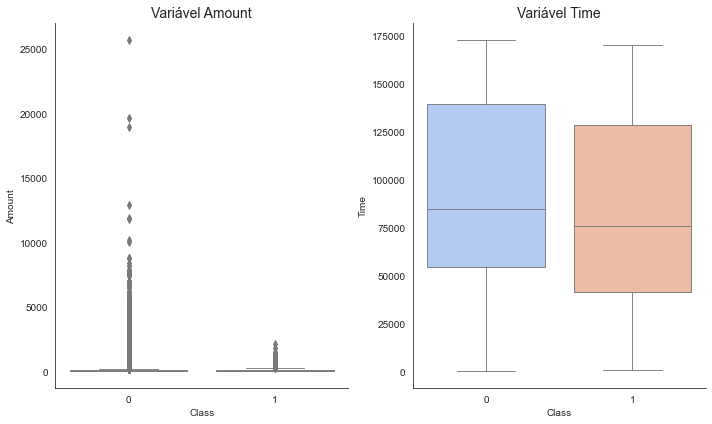

In [5]:
# Alterando o estilo do seaborn
sns.set_style("white")

# Criando a figura
fig, ax = plt.subplots(figsize=(10,6), ncols=2)
sns.despine(top=True, right=True)

# Plotando a variável Amount
sns.boxplot(x=df.Class, y=df.Amount, ax=ax[0], linewidth=.9, palette="coolwarm")
ax[0].set_title("Variável Amount", size='14')

# Plotando a variável Time
sns.boxplot(x=df.Class, y=df.Time,ax=ax[1], linewidth=.9, palette="coolwarm")
ax[1].set_title("Variável Time", size='14')

# Exibindo
plt.tight_layout()



Vemos que a variável `Amount` possui uma grande quantidade de *outliers*, situação muito diferente da variável `Time`, que não possui nenhum.

In [6]:
# Informações estatísticas da variável Amount em relação a variável class==1
df[(df.Class == 1)]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
# Informações estatísticas da variável Amount em relação a variável class==0
df[(df.Class == 0)]['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

A presença de *outliers* fica ainda mais nítida ao exibimos as informações estatísticas da variável em relação à variável alvo em seus valores para transações fraudulentas (`1`) e para transações autênticas (`0`). Basta olharmos para o valor bastante grande no desvio padrão, além da grande diferença nas médias e medianas em comparação aos valores mínimos e máximos em ambos os casos.

Verificaremos, nas próximas etapas, a necessidade de tratamento desses *outliers* em busca de um maior desempenho em nosso modelo de classificação.

Seguindo em nossa análise exploratória, iremos agora: 

* Plotar um gráfico *countplot* para ver o balanceamento do *dataset*
* Plotar uma matriz de correlação

---Contagem dos valores da variável Class.---

0 = Transações autênticas  1 = Transações fraudulentas

0    284315
1       492
Name: Class, dtype: int64

Transações fraudulentas representam apenas 0.173% dos dados
.


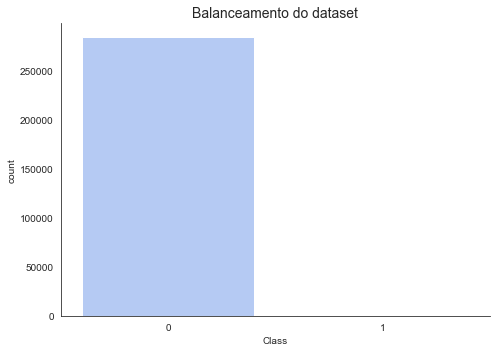

In [8]:
# Exibindo as informações estatísiticas
print("---Contagem dos valores da variável Class.---\n")
print("0 = Transações autênticas  1 = Transações fraudulentas\n")
print(df.Class.value_counts())
print("\nTransações fraudulentas representam apenas {:.3%}".format(((df.Class ==1 ).sum()) / (df.shape[0])), "dos dados\n.")

# Plotando o gráfico do balanceamento do dataset
fig, ax = plt.subplots(figsize=(7,5))
sns.despine(top=True, right=True)
sns.countplot(x="Class", data=df,  palette="coolwarm", ax=ax)
ax.set_title("Balanceamento do dataset", size=14)
plt.tight_layout()

Como é [informado no tópico **Content** na página original](https://www.kaggle.com/mlg-ulb/creditcardfraud), os dados do *dataset* estão bastante desbalanceados, e com o gráfico acima percebemos isso nitidamente.
Essa discrepância nos dados atrapalhará o modelo e precisará ser tratada.

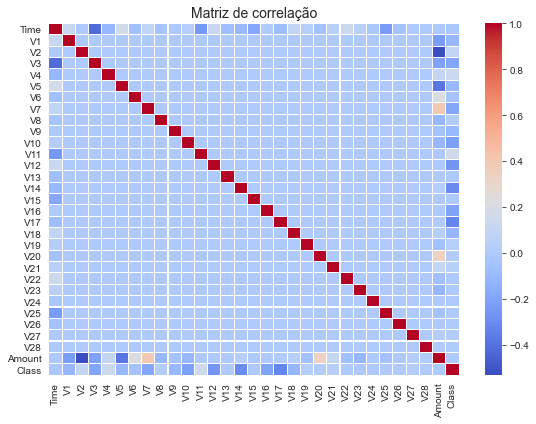

In [9]:
# Plotando a matriz de correlação
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(df.corr(), linewidth=.05, cmap="coolwarm", ax=ax)
ax.set_title("Matriz de correlação", size=14)

plt.tight_layout()

A matriz de correlação não nos dá quase informação nenhuma, isso pode ser devido ao alto desbalanceamento presente nos dados, como vimos anteriormente.

Com isso podemos passar para a etapa de tratamento e preparação dos dados para serem utilizados em nosso modelo de classificação.

## Tratamento e preparação dos Dados <a name='tratamento_dados'></a>

Nessa etapa iremos tratar os problemas que encontramos na etapa de análise de modo a preparar os dados da melhor maneira para serem utilizados pelo algoritmo de *machine learning* e alcançarmos um bom desempenho na previsão das transações.
Para isso, precisaremos:

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`);
* Buscar e tratar os *outliers*;
* Dividir o conjunto de dados entre treino e teste para serem utilizados no modelo.
* Balancear o conjunto de dados;
* Avaliar a qualidade dos dados após os tratamentos realizados;



In [10]:
# Importando os pacotes auxiliares de Machine Learning para tratamento dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [11]:
# Normalizando as variáveis Time e Amount

# Copiando o dataframe para um novo
df_norm = df.copy()

# Instanciando o StandardScaler
std_scaler = StandardScaler()

# Normalizando
df_norm["TimeNorm"] = std_scaler.fit_transform(df.Time.values.reshape(-1,1))
df_norm["AmountNorm"] = std_scaler.fit_transform(df.Amount.values.reshape(-1,1))

# Excluir as variáveis não normalizadas do DataFrame
df_norm.drop(["Time", "Amount"], axis=1, inplace=True)

# Exibindo o DataFrame com as variáveis normalizadas
df_norm.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,TimeNorm,AmountNorm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


Com o código acima realizamos a normalização das variáveis e armazenamos seus valores normalizados em duas novas variáveis `TimeNorm` e `AmountNorm`. Com esse processo não temos o risco de o algoritmo dar mais ou menos peso à essas colunas devido aos seus valores estarem em escala diferente do restante do *dataset*, já que essa técnica coloca os valores das colunas informadas em uma escala igual ao restante dos dados sem retirar as informações que possuem.

Passaremos agora para a análise e tratamento dos *outliers*. Trataremos apenas a variável `Amount`, que agora é `AmountNorm`, já que não identificamos *outliers* na variável `Time`.
Para a limpeza utilizaremos a regra do [IQR Score](https://online.stat.psu.edu/stat200/lesson/3/3.2).

In [12]:
# Calculando o Q1 e o Q3
q1 = df_norm.AmountNorm.quantile(.25)
q3 = df_norm.AmountNorm.quantile(.75)

# Calculando o IQR
IQR = q3 - q1

# Definindo os limites superior e inferior
sup = q3 + 1.5 * IQR
inf = q1 - 1.5 * IQR

# Limpando os outliers
df_clean = df_norm.copy()
df_clean.drop(df_clean[df_clean.AmountNorm > sup].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.AmountNorm < inf].index, axis=0, inplace=True)


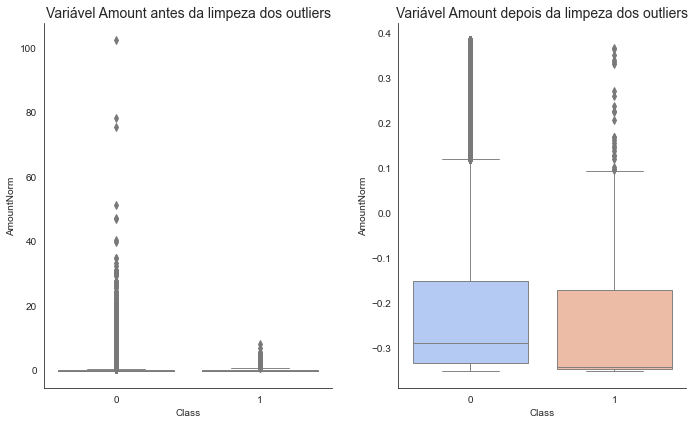

In [13]:
# Criando a figura
fig, ax = plt.subplots(figsize=(10,6), ncols=2)
sns.despine(top=True, right=True)

# Plotando a variável Amount antes da limpeza dos outliers
sns.boxplot(x=df_norm.Class, y=df_norm.AmountNorm, ax=ax[0], linewidth=.9, palette="coolwarm")
ax[0].set_title("Variável Amount antes da limpeza dos outliers", size='14')

# Plotando a variável Amount depois da limpeza dos outliers
sns.boxplot(x=df_clean.Class, y=df_clean.AmountNorm, ax=ax[1], linewidth=.9, palette="coolwarm")
ax[1].set_title("Variável Amount depois da limpeza dos outliers", size='14')

# Exibindo
plt.tight_layout()

In [14]:
# Exibindo as informações estatísiticas antes da limpeza
print("Exibindo as informações estatísiticas antes da limpeza")
print(df_norm.AmountNorm.describe())

# Exibindo as informações estatísiticas após a limpeza
print("\nExibindo as informações estatísiticas após a limpeza")
print(df_clean.AmountNorm.describe())

Exibindo as informações estatísiticas antes da limpeza
count    2.848070e+05
mean     2.913952e-17
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: AmountNorm, dtype: float64

Exibindo as informações estatísiticas após a limpeza
count    252903.000000
mean         -0.213397
std           0.168608
min          -0.353229
25%          -0.335278
50%          -0.289260
75%          -0.153365
max           0.384418
Name: AmountNorm, dtype: float64


É visível a melhoria da qualidade dos dados após a técnica do IQR Score ter sido aplicada para realizar a limpeza dos *outliers*. Através do boxplot conseguimos visualizar agora os quartis e os limites superior e inferior, algo que sequer era visível antes da limpeza. Nas informações estatísticas temos um comportamento muito mais uniforme, um desvio padrão menor e valores de média e mediana muito mais próximos.

Vamos, agora, dividir os dados entre treino e teste. Essa  etapa é essencial na construção de modelos de *machine learning*, pois nos permite treinar o modelo com parte dos dados e testar seu desempenho com restante, simulando como seria seu comportamento se o aplicássemos em dados completamente novos. Um dos passos a serem feitos durante essa divisão é a separação dos dados entre *feature matrix* e *target vector*, que são:

* ***Feature matrix***: matriz com todas as variáveis que serão utilizadas pelo modelo para prever a variável alvo;
* ***Target vector***: vetor alvo (ou variável alvo), é a variável que desejamos que seja prevista corretamente pelo modelo.

In [15]:
# Dividindo os dados entre treino e teste

# Separando os dados entre feature matrix e target vector
X = df_clean.drop("Class", axis=1)
y = df_clean.Class

# Separar os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

Agora iremos realizar o balanceamento dos dados. Aplicaremos a técnica de *undersampling*. De maneira resumida, essa técnica consiste em diminuir a quantidade de observações com a maior número de classificação de modo a equalizar. O portal [**Data Hackers**](https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9) possui um excelente artigo que explica as diversas formas de balanceamento de dados, incluindo a que será utilizada aqui.

In [16]:
# Balanceando os dados 

# Instanciando o RandomUnderSampler
rus = RandomUnderSampler()

#Balanceando X_train e y_train
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

---Contagem dos valores da variável Class após o balanceamento.---

0 = Transações autênticas  1 = Transações fraudulentas

1    301
0    301
Name: Class, dtype: int64


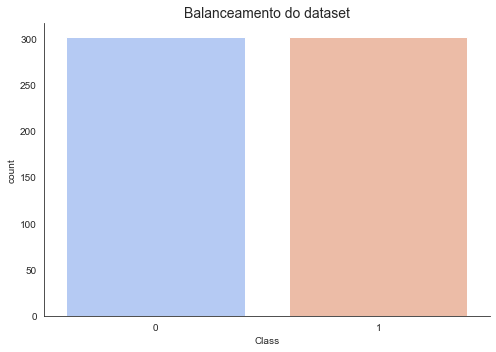

In [17]:
# Exibindo as informações estatísiticas após o balanceamento
print("---Contagem dos valores da variável Class após o balanceamento.---\n")
print("0 = Transações autênticas  1 = Transações fraudulentas\n")
print(y_train_rus.value_counts())


# Plotando o gráfico do balanceamento do dataset após o balanceamento
fig, ax = plt.subplots(figsize=(7,5))
sns.despine(top=True, right=True)
sns.countplot(x=y_train_rus, palette="coolwarm", ax=ax)
ax.set_title("Balanceamento do dataset", size=14)
plt.tight_layout()

Como nosso *dataset* continha poucas observações para a classificação `Class == 1`, a técnica de *undersampling* reduziu a quantidade de observações para a classificação majoritária `Class == 0` equalizando ambas e, assim, balanceando os dados.

Agora que nossos dados estão tratados, normalizadas, limpos de *outliers* e balanceados, podemos passar para a etapa de construção do modelo de *machine learning* para, enfim, atacarmos o problema principal: **construir um modelo que possa detectar transações fraudulentas em cartões de crédito**.

## Construção do modelo de Machine Learning <a name='machine_learning'></a>

Nosso problema trata da previsão de transações fraudulentas, ou seja, detectar quando uma transação é autêntica ou não. Para isso, nossa variável alvo pode assumir dois valores distintos, conforme explicado na etapa do [dicionário de variáveis](#dicionario_variaveis): 0 - para transações autênticas e 1 - para transações fraudulentas. Isso significa dizer que essa variável assume **valores discretos**, pode ser apenas 1 ou 0, mas não pode assumir nenhum outro valor intermediário ou contínuo (*0.01*, *0.001*, *0.02*, *0.98*, etc..), será sempre 0 ou 1. Para esse tipo de problemas usamos modelos de **Classificação**, que classificará a variável dentro dos valores discretos que ela pode assumir (mais sobre isso [aqui](https://icrowdnewswire.com/2017/12/11/diferenca-entre-classificacao-e-regressao-na-aprendizagem-de-maquinas/)).

Existem diversos modelos que podem ser aplicados em tarefas de classificação, nesse estudo aplicaremos dois: **Regressão Logística** e **Árvore de decisão**. Em seguida avaliaremos qual dos dois teve o melhor desempenho na resolução do problema.



In [18]:
# Importando os pacotes de modelos de Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt

In [19]:
## Criando o modelo de Regressão Logistica ##

# Instanciando o modelo
np.random.seed(2)
logistic_model = LogisticRegression(C=0.01)

# Fit do modelo de Regressão
logistic_model.fit(X_train_rus, y_train_rus)

# Testando o modelo com os dados de teste
logistic_y_pred = logistic_model.predict(X_test)

In [20]:
## Criando o modelo de Árvore de Decisão ##

# Instanciando o modelo
np.random.seed(2)
tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=6)

# Fit do modelo de Árvore de Decisão
tree_model.fit(X_train_rus, y_train_rus)

# Testando o modelo com os dados de teste
tree_y_pred = tree_model.predict(X_test)

Com isso criamos os dois modelos de previsão, testamos sua performance nos dados de teste e armazenamos os valores previstos em duas variáveis: `logistic_y_pred` para o modelo de Regressão Logística e `tree_y_pred` para o modelo de Árvore de Decisão.

Podemos passar, agora, para a etapa de avaliação de ambos.

## Avaliar o desempenho do modelo <a name='avaliando_modelo'></a>

Existem diversas métricas e ferramentas que auxiliam na avaliação de um modelo de *Machine Learning*. Aqui, usaremos como ferramentas a **Confusion Matrix** e o **Classification Report** e como métricas utilizaremos principalmente a **Acurácia**, a **AUC** e o **Recall**.

De maneira resumida, o funcionamento dessas ferramentas e métricas é o seguinte:

* **Confusion Matrix**: plota uma matriz que possui, eu sei eixo Y, os valores verdadeiros (originais) dos dados de teste e no eixo X os valores previstos pelo algoritmo para cada classificação possível da variável alvo;
* **Classification Report**: relatório com as principais métricas utilizadas divididas para cada classificação possível da variável alvo;
* **Acurácia**: fração de predições corretas (no total). Pode ser resumida em "*Quanto o modelo está acertando?"*. É preciso tomar cuidado com essa métrica, pois pode nos dar uma falsa sensação de bom desempenho, pois um modelo pode ter uma acurácia de 99% e acertar apenas 60% uma classificação específica (mais sobre [aqui](sigmoidal.ai/como-lidar-com-dados-desbalanceados/));
* **AUC**: fornece uma medida agregada de desempenho em todos os limites de classificação possíveis. Uma maneira de interpretar AUC é como a probabilidade de que o modelo classifique um exemplo positivo aleatório mais alto do que um exemplo negativo aleatório. Quanto mais próximo de 1, melhor. Um modelo cujas previsões estão 100% erradas tem uma AUC de 0,0; aquele cujas previsões são 100% corretas tem uma AUC de 1,0 (mais sobre [aqui](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)); 
* **Recall**: qual a porcentagem de classificações positivas (em nosso exemplo: **1 - Fraudulentas**) o modelo consegue prever. Pode ser resumida em: "*Dentre os positivos reais, qual a proporção de acerto?*".


In [21]:
# Importando pacotes para avaliação do modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score

---------------AVALIANDO O MODELO DE REGRESSÃO LOGÍSTICA---------------

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    246993
           1       0.01      0.88      0.02        26

    accuracy                           0.99    247019
   macro avg       0.50      0.94      0.51    247019
weighted avg       1.00      0.99      0.99    247019


--Métricas do modelo--

Acurácia: 99.02%
AUC: 0.94
Recall: 88.46%
Confusion Matrix


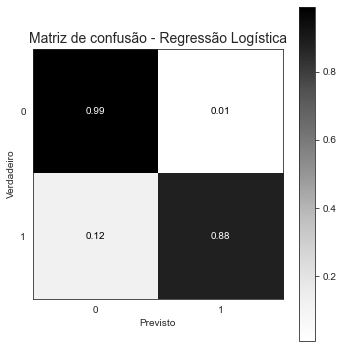

In [22]:
print("---------------AVALIANDO O MODELO DE REGRESSÃO LOGÍSTICA---------------")
print("\nClassification Report\n")
# Imprimindo o classification report
print(classification_report(y_test, logistic_y_pred))

print("\n--Métricas do modelo--\n")
# Imprimindo as métricas
print("Acurácia: {:.2%}".format(accuracy_score(y_test, logistic_y_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_test, logistic_y_pred)))
print("Recall: {:.2%}".format(recall_score(y_test, logistic_y_pred)))

print("Confusion Matrix")
# Criando a figura
fig, ax = plt.subplots(figsize=(5,5))

# Plotando a matriz
skplt.metrics.plot_confusion_matrix(y_test, logistic_y_pred, ax=ax, normalize=True, cmap="Greys")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
ax.set_title("Matriz de confusão - Regressão Logística", size="14")

# Exibindo
plt.tight_layout()

---------------AVALIANDO O MODELO DE ÁRVORE DE DECISÃO---------------

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    246993
           1       0.00      0.92      0.00        26

    accuracy                           0.94    247019
   macro avg       0.50      0.93      0.49    247019
weighted avg       1.00      0.94      0.97    247019


--Métricas do modelo--

Acurácia: 93.84%
AUC: 0.93
Recall: 92.31%
Confusion Matrix


<Figure size 432x288 with 0 Axes>

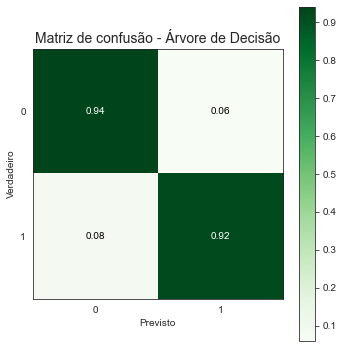

In [23]:


print("---------------AVALIANDO O MODELO DE ÁRVORE DE DECISÃO---------------")
print("\nClassification Report\n")
# Imprimindo o classification report
print(classification_report(y_test, tree_y_pred))

print("\n--Métricas do modelo--\n")
# Imprimindo as métricas
print("Acurácia: {:.2%}".format(accuracy_score(y_test, tree_y_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_test, tree_y_pred)))
print("Recall: {:.2%}".format(recall_score(y_test, tree_y_pred)))
plt.tight_layout()

print("Confusion Matrix")
# Criando a figura
fig, ax = plt.subplots(figsize=(5,5))

# Plotando a matriz
skplt.metrics.plot_confusion_matrix(y_test, tree_y_pred, ax=ax, normalize=True, cmap="Greens")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
ax.set_title("Matriz de confusão - Árvore de Decisão", size="14")

# Exibindo
plt.tight_layout()

Ao avaliarmos os modelos, percebemos que o modelo de *Árvores de decisão* tem o melhor desempenho nos dados utilizados para a previsão das fraudes.
Nas simulações feitas durante este estudo, o modelo conseguiu prever cerca de 92% das transações fraudulentas contra 88% de acerto no modelo de *Regressão Logística*.

## Conclusão  <a name='conclusao'></a>

Modelos de aprendizagem de máquina são grandes aliados a todo o tipo de empresa e para diversas tarefas diferentes. Aplicar um algoritmo de *Machine Learning* para detectar transações fraudulentas em cartões de crédito pode significar a economia de milhões de reais em apenas um dia. Porém, conforme vimos durante o estudo, algo que precisa ser realizado com  máximo de cuidado vem antes mesmo da construção do modelo em si: as etapas de análise e tratamento dos dados. Sem uma análise correta e um tratamento bem feito o modelo aplicado não terá um bom desempenho e não conseguirá desempenhar com assertividade sua tarefa.

Após um bom tratamento ambos os modelos construídos tiveram um ótimo desempenho, mesmo sem realizarmos *tunning* em seus hiperparâmetros.